<a href="https://colab.research.google.com/github/seyoung0218/AIFFEL-Datathon/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%86%A42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import missingno as msno

original = pd.read_csv('/content/drive/MyDrive/데이터톤/Stores.csv')
data = original.copy()

In [ ]:
data['item_per_area'] = data['Items_Available']/data['Store_Area']

data['customer_per_area'] = data['Daily_Customer_Count']/ data['Store_Area']

data['sales_per_area'] = data['Store_Sales']/ data['Store_Area']

data['customer_per_item'] = data['Daily_Customer_Count']/data['Items_Available']

data['sales_per_item'] = data['Store_Sales']/data['Items_Available']

data['sales_per_customer'] = data['Store_Sales']/data['Daily_Customer_Count']

In [ ]:
data.keys()

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales', 'item_per_area', 'customer_per_area', 'sales_per_area',
       'customer_per_item', 'sales_per_item', 'sales_per_customer'],
      dtype='object')

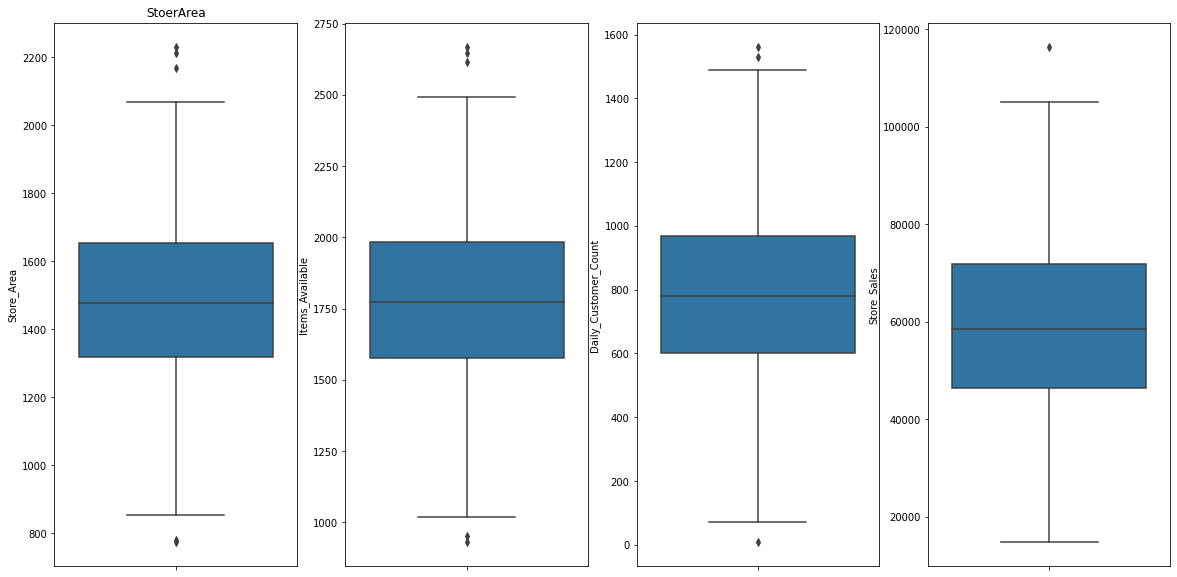

In [ ]:
fig , ax = plt.subplots(1,4)
fig.set_size_inches(20,10)
sns.boxplot(y = 'Store_Area', data = data, ax=ax[0])
ax[0].set_title('StoerArea')
sns.boxplot(y = 'Items_Available', data = data, ax=ax[1])
sns.boxplot(y = 'Daily_Customer_Count', data = data, ax=ax[2])
sns.boxplot(y = 'Store_Sales', data = data, ax=ax[3])

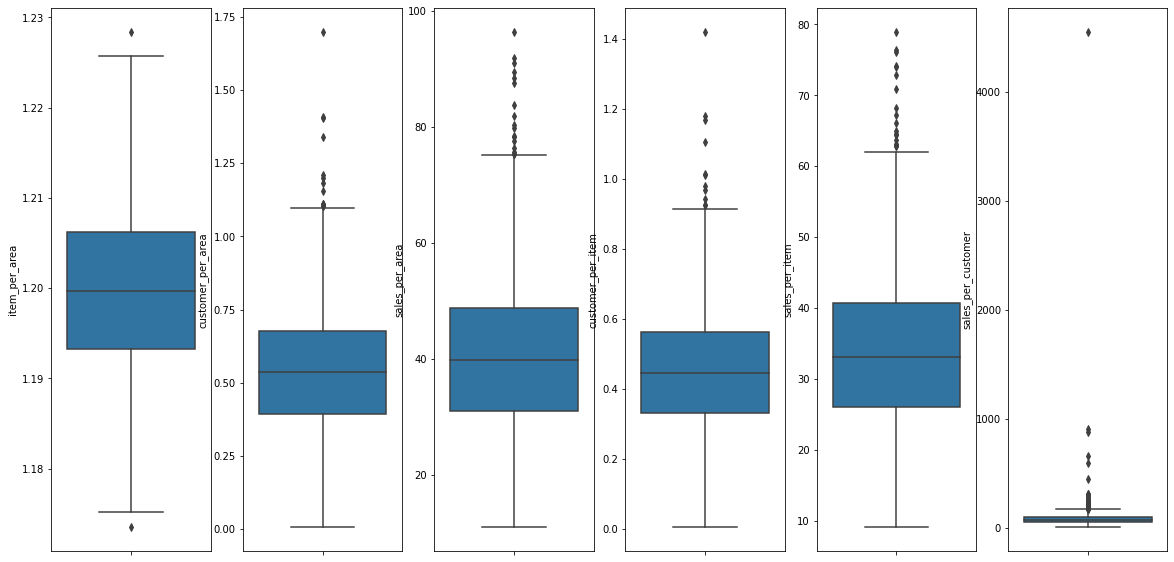

In [ ]:
fig , ax = plt.subplots(1,6)
fig.set_size_inches(20,10)
sns.boxplot(y = 'item_per_area', data = data, ax=ax[0])
sns.boxplot(y = 'customer_per_area', data = data, ax=ax[1])
sns.boxplot(y = 'sales_per_area', data = data, ax=ax[2])
sns.boxplot(y = 'customer_per_item', data = data, ax=ax[3])
sns.boxplot(y = 'sales_per_item', data = data, ax=ax[4])
sns.boxplot(y = 'sales_per_customer', data = data, ax=ax[5])

In [ ]:
data.keys()

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales', 'item_per_area', 'customer_per_area', 'sales_per_area',
       'customer_per_item', 'sales_per_item', 'sales_per_customer'],
      dtype='object')

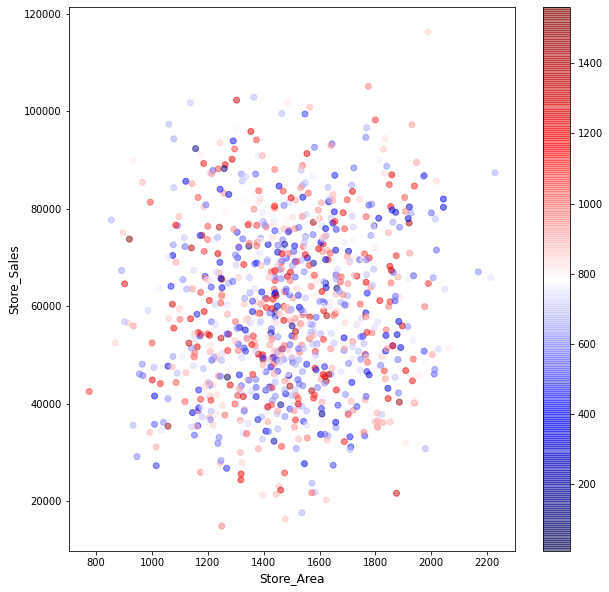

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(data['Store_Area'],
            data['Store_Sales'],
            c = data['Daily_Customer_Count'],
            cmap = 'seismic',
            alpha = 0.5)
plt.colorbar()
plt.xlabel('Store_Area', size = 12)
plt.ylabel('Store_Sales', size = 12)
plt.show()

In [ ]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,item_per_area,customer_per_area,sales_per_area,customer_per_item,sales_per_item,sales_per_customer
0,1,1659,1961,530,66490,1.182037,0.319470,40.078360,0.270270,33.906170,125.452830
1,2,1461,1752,210,39820,1.199179,0.143737,27.255305,0.119863,22.728311,189.619048
2,3,1340,1609,720,54010,1.200746,0.537313,40.305970,0.447483,33.567433,75.013889
3,4,1451,1748,620,53730,1.204686,0.427292,37.029635,0.354691,30.737986,86.661290
4,5,1770,2111,450,46620,1.192655,0.254237,26.338983,0.213169,22.084320,103.600000


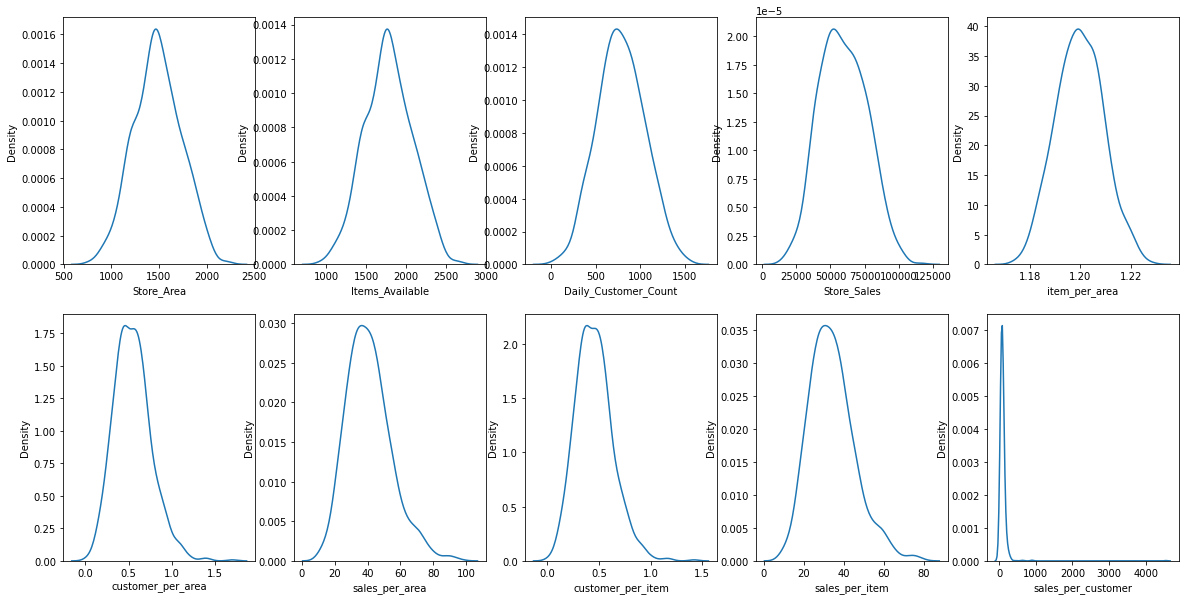

In [ ]:
fig, ax = plt.subplots(2,5)
fig.set_size_inches(20,10)
sns.kdeplot(data['Store_Area'], ax=ax[0,0])
sns.kdeplot(data['Items_Available'], ax=ax[0,1])
sns.kdeplot(data['Daily_Customer_Count'], ax=ax[0,2])
sns.kdeplot(data['Store_Sales'], ax=ax[0,3])
sns.kdeplot(data['item_per_area'], ax=ax[0,4])
sns.kdeplot(data['customer_per_area'], ax=ax[1,0])
sns.kdeplot(data['sales_per_area'], ax=ax[1,1])
sns.kdeplot(data['customer_per_item'], ax=ax[1,2])
sns.kdeplot(data['sales_per_item'], ax=ax[1,3])
sns.kdeplot(data['sales_per_customer'], ax=ax[1,4])

In [ ]:
target = data['Store_Sales']

In [ ]:
data.drop('Store_Sales', axis=1, inplace=True)

In [ ]:
data.drop('Store ID ', axis=1, inplace=True)

# 최근접 이웃 회귀

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((716, 9), (180, 9))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
print(knr.score(X_test, y_test)) 

0.8918746900854695


In [ ]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

5423.584009777216

In [ ]:
data

array([[ 0.69409138,  0.59713547, -0.9664807 , ..., -1.03013975,
        -0.02216064,  0.19301911],
       [-0.09760039, -0.10021771, -2.17293004, ..., -1.86451557,
        -1.00261649,  0.58733437],
       [-0.58141204, -0.57735409, -0.25015141, ..., -0.04706257,
        -0.05187266, -0.11693907],
       ...,
       [-1.1411941 , -1.15458901,  1.03170101, ...,  1.56546096,
         1.67291663, -0.13476438],
       [-0.74534821, -0.74084837, -0.0616437 , ...,  0.20871251,
         2.4358792 ,  0.19310946],
       [-1.24515363, -1.17794534,  1.22020871, ...,  1.7796223 ,
         0.33925841, -0.27707684]])

# 다중선형회귀

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, y_train)
y_pred = lr.predict(test_poly)


In [ ]:
#테스트 데이터의 정확도
print(lr.score(test_poly, y_test))

1.0


In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

3.3936196644632593e-07

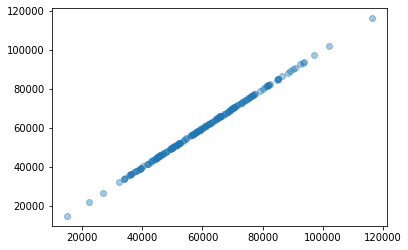

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.show()

## 랜덤포레스트회귀

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(rf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(rf.score(X_test, y_test)))

훈련세트 정확도: 0.998
테스트세트 정확도: 0.974


In [ ]:
y_pred

array([61228.6, 76630.7, 47756.4, 36257.9, 44828.1, 49493.3, 69168.3,
       45348.4, 37374.7, 60732.4, 63833.2, 38518.5, 52925. , 86399. ,
       48090.2, 89689.9, 85259.4, 83720. , 66908. , 53102.1, 57977.4,
       72911.9, 67301.3, 59652.3, 39493.4, 74315.6, 79384.6, 70419.8,
       68344.5, 29563. , 42862. , 72454.4, 56572.4, 63793.9, 57935.5,
       80744.6, 50667.4, 62113.7, 59759.7, 86720.8, 65982.3, 44555.5,
       95808.4, 50369. , 54374. , 89592.2, 72934. , 90741.9, 52801.9,
       60792.3, 77998.9, 45500.5, 30820.8, 83942.8, 62972.1, 67579.3,
       56344.3, 50061.5, 70166.8, 36132.6, 91938.1, 49749.4, 59321.3,
       49949.4, 66597.7, 56728.1, 79409.6, 90063.6, 50169.9, 41932.7,
       44139. , 66994.7, 69711. , 55330.9, 54856.5, 35997. , 71230.2,
       63329.8, 48661.4, 54383.8, 50262.3, 47139.5, 76144.4, 64772.6,
       45171.4, 39820.5, 33609.2, 73719.7, 38783.7, 43547.4, 52840.1,
       59325.3, 51165.8, 33355.6, 28952. , 39993.6, 84447.4, 82702.7,
       58228.4, 6609

In [ ]:
y_test

711    61080
440    76300
525    44890
722    36280
39     45480
       ...  
845    65970
25     70050
84     90180
10     71280
331    81470
Name: Store_Sales, Length: 180, dtype: int64

In [ ]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

2650.916310856808

In [ ]:
rf.feature_importances_

array([0.09033359, 0.09502792, 0.00386981, 0.0030294 , 0.00123383,
       0.40573463, 0.00126601, 0.36267318, 0.03683162])